## Sales of items in different place

In [163]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re

In [164]:
data=pd.read_excel("C:/nidhisha/intership/data_visul.xlsx")
data.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dates,1,Mangalore


In [165]:
data.shape

(111, 4)

In [166]:
data.dtypes

DATE           datetime64[ns]
DESCRIPTION            object
UNIT                    int64
PLACE                  object
dtype: object

In [167]:
#checking the missing value
data.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
dtype: int64

In [168]:
# counting the number of the place.
data["PLACE"].value_counts()

Malappuram                  10
Noida - UP                   6
Eloor                        6
Kottayam                     6
Mumbai                       6
United States                5
Kochi                        5
To Kottayam                  5
Eroor - Vytila               5
Pathanamthitta               4
Nettoor                      4
Bangalore to US              4
Kadavanthra                  3
Tripunithura                 3
Kolenchery                   3
Vazhakala                    3
Pune                         3
Kanjiramttom                 2
Jabalpur - Madhyapradesh     2
Chennai                      2
Kumily                       2
Mangalore - Ullal            2
Kakkanad                     2
Thrissur/ Guruvayoor         1
Bangalore                    1
malappuram                   1
Bangalore                    1
Mangalore                    1
Aroor                        1
Tripunithurra                1
Tripunithura                 1
Padappai- Tamilnadu          1
kadavant

In [169]:
# counting the number of description.
data["DESCRIPTION"].value_counts()

Beef          32
Prawns        31
Fish          13
Mango         10
Lemon          9
King Fish      7
Dates          3
Dryfruits      3
Dry fruits     2
Kadumanga      1
Name: DESCRIPTION, dtype: int64

### cleaning the data

In [170]:
# using capitalize function which return a copy of the string with first letter capitalized.
data["PLACE"]=data["PLACE"].str.capitalize()

In [171]:
#correcting the mistake in place column, description column. 
def correcting_mistake(col_name,place,change_name):
    data[col_name]=data[col_name].replace(place,change_name)
    return data[col_name]

In [172]:
correcting_mistake("PLACE","To kottayam","Kottayam")
correcting_mistake("PLACE","Tripunithurra","Tripunithura")
correcting_mistake("PLACE","Mangalore - ullal","Mangalore")
correcting_mistake("PLACE","Eroor - vytila","Eloor")

0        Kolenchery 
1        Kolenchery 
2      Tripunithura 
3         Bangalore 
4          Mangalore
           ...      
106              NaN
107              NaN
108              NaN
109              NaN
110              NaN
Name: PLACE, Length: 111, dtype: object

In [173]:
data.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
dtype: int64

In [174]:
correcting_mistake("DESCRIPTION","Dryfruits","Dry fruits")
correcting_mistake("DESCRIPTION","Dates","Dry fruits")
correcting_mistake("DESCRIPTION","King Fish","Fish")

0            Beef
1            Fish
2            Beef
3          Prawns
4      Dry fruits
          ...    
106         Lemon
107          Beef
108          Beef
109        Prawns
110         Lemon
Name: DESCRIPTION, Length: 111, dtype: object

In [175]:
data.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
dtype: int64

In [176]:
# checking the value,after correcting the mistake
data["PLACE"].value_counts()

Malappuram                  11
Kottayam                    11
Eloor                       11
Noida - up                   6
Mumbai                       6
Kochi                        5
United states                5
Kadavanthra                  4
Tripunithura                 4
Pathanamthitta               4
Bangalore to us              4
Nettoor                      4
Kolenchery                   3
Pune                         3
Mangalore                    3
Vazhakala                    3
Kanjiramttom                 2
Jabalpur - madhyapradesh     2
Chennai                      2
Kumily                       2
Kakkanad                     2
Tripunithura                 1
Padappai- tamilnadu          1
Bangalore                    1
Aroor                        1
Thrissur/ guruvayoor         1
Bangalore                    1
Name: PLACE, dtype: int64

In [177]:
data["DESCRIPTION"].value_counts()

Beef          32
Prawns        31
Fish          20
Mango         10
Lemon          9
Dry fruits     8
Kadumanga      1
Name: DESCRIPTION, dtype: int64

In [178]:
# filling the missing value with mode corresponding to the description in each "place" cloumn.
data["PLACE"]=data["PLACE"].fillna(data.groupby(["DESCRIPTION"])["PLACE"].transform(lambda x:pd.Series.mode(x)[0]))

In [179]:
# here we obseverd that date,descrpition,place values are same,so megering the row and adding the unit.
data[data["PLACE"]=="Mangalore"]

,DATE,DESCRIPTION,UNIT,PLACE
4,2022-04-06,Dry fruits,1,Mangalore
58,2022-05-19,Beef,1,Mangalore
59,2022-05-19,Beef,1,Mangalore


In [180]:
data=data.groupby(["DATE","DESCRIPTION","PLACE"],as_index=False).agg({"DATE":"first","DESCRIPTION":"first","UNIT":"sum","PLACE":"first"})


In [181]:
data[data["PLACE"]=="Mangalore"]

,DATE,DESCRIPTION,UNIT,PLACE
4,2022-04-06,Dry fruits,1,Mangalore
60,2022-05-19,Beef,2,Mangalore


In [182]:
data.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          0
dtype: int64

In [183]:
data.shape

(103, 4)

In [184]:
data["PLACE"].value_counts()

Malappuram                  13
Eloor                       13
Kottayam                    11
Noida - up                   6
Kochi                        5
Bangalore to us              5
Tripunithura                 4
Pathanamthitta               4
United states                4
Nettoor                      4
Mumbai                       4
Vazhakala                    3
Kolenchery                   3
Pune                         3
Kadavanthra                  3
Kanjiramttom                 2
Jabalpur - madhyapradesh     2
Chennai                      2
Kumily                       2
Mangalore                    2
Kakkanad                     2
Tripunithura                 1
Padappai- tamilnadu          1
Aroor                        1
Bangalore                    1
Thrissur/ guruvayoor         1
Bangalore                    1
Name: PLACE, dtype: int64

In [185]:
data

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dry fruits,1,Mangalore
...,...,...,...,...
98,2022-07-05,Prawns,4,Malappuram
99,2022-07-08,Beef,1,Eloor
100,2022-07-15,Beef,1,Eloor
101,2022-07-15,Lemon,1,Bangalore to us


### data visulization

In [217]:
# creating the sub dataframe only the detail of beef
df_beef=data[data["DESCRIPTION"]=="Beef"]
df_beef.sort_values(["UNIT"],ascending=False,axis=0,inplace=True)
df_beef.head()
df_beef10=df_beef.head(10)


C:\Users\Pratheek\AppData\Local\Temp\ipykernel_6912\3684863544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beef.sort_values(["UNIT"],ascending=False,axis=0,inplace=True)


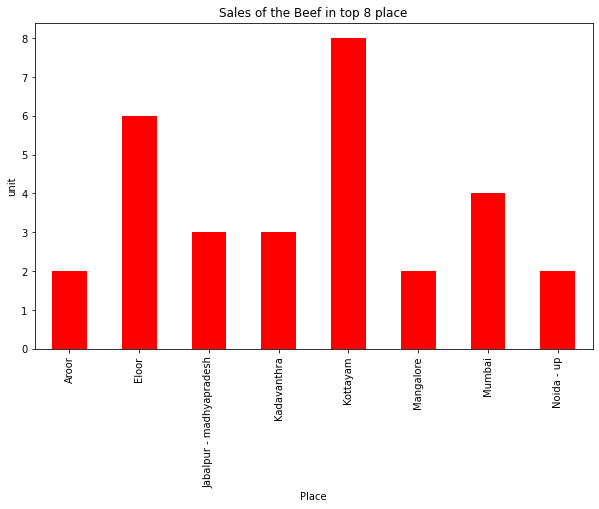

In [216]:
#ploting the graph represent the sales of the beef in top 8 place
beef=df_beef10.groupby("PLACE")["UNIT"].sum()
plt.figure(figsize=(10,6))
beef.plot(kind="bar",title="Sales of the Beef in top 8 place",legend=False,color="r")
plt.xlabel("Place")
plt.ylabel("unit")
plt.show()


####  The above graph represent the sales of beef in top 8 place. In this we observed that Kottayam place has highest demand.

In [270]:
# creating the sub dataframe only the detail of dry fruits
df_dryfruits=data[data["DESCRIPTION"]=="Dry fruits"]
df_dryfruits.sort_values(["UNIT"],ascending=False,axis=0,inplace=True)
df_dryfruits.head()
df_dryfruits10=df_dryfruits.head(10)

C:\Users\Pratheek\AppData\Local\Temp\ipykernel_6912\3642441264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dryfruits.sort_values(["UNIT"],ascending=False,axis=0,inplace=True)


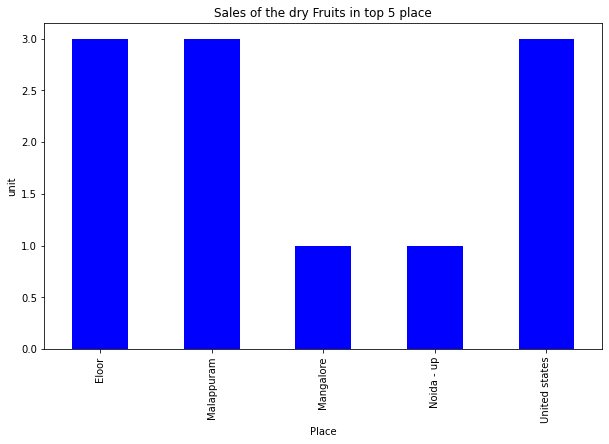

In [275]:
#ploting the graph represent the sales of the dry fruits in top 5 place
dry_f=df_dryfruits10.groupby("PLACE")["UNIT"].sum()
plt.figure(figsize=(10,6))
dry_f.plot(kind="bar",title="Sales of the dry Fruits in top 5 place",legend=False,color="b")
plt.xlabel("Place")
plt.ylabel("unit")
plt.show()

####  The above graph represent the sales of beef in top 5 place. In this we observed that Malappyran,eloor,united-states place has highest demand.

In [244]:
#grouping the date per month and decription to know sales of description per month
#data1=data.set_index("DATE")
df2=data.groupby([pd.Grouper(key="DATE",freq="M"),"DESCRIPTION"]).agg({"UNIT":"sum"})
df2


UNIT
DATE       DESCRIPTION      
2022-04-30 Beef           20
           Dry fruits      3
           Fish           17
           Kadumanga       1
           Lemon           4
           Mango           7
           Prawns         16
2022-05-31 Beef           16
           Dry fruits      6
           Fish            5
           Lemon           4
           Mango           9
           Prawns         15
2022-06-30 Beef           14
           Dry fruits      2
           Fish           14
           Mango           3
           Prawns         21
2022-07-31 Beef            2
           Fish            2
           Lemon           5
           Prawns          5

In [266]:
# grouping the date per month to know the overall sales of description per month.
df2=data.groupby(pd.Grouper(key="DATE",freq="M")).agg({"UNIT":"sum"})
df2

,UNIT
DATE,
2022-04-30,68
2022-05-31,55
2022-06-30,54
2022-07-31,14


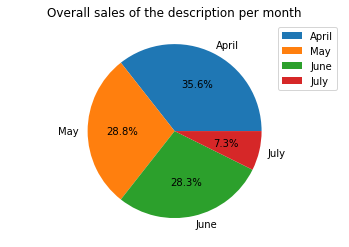

In [277]:
# from above data ploting the pie chart in percentage(%)
date=["April","May","June","July"]
unit=[68,55,54,14]
plt.axis("equal")
plt.pie(unit,labels=date,autopct="%1.1f%%")
plt.legend(date)
plt.title("Overall sales of the description per month")
plt.show()

#### The above graph represent the overall sales of the description per month. From this graph we observed that more sales in month of april.

In [203]:
# summing the vaue of unit based on description
df1=data.groupby("DESCRIPTION").agg({"UNIT":"sum"})

<Figure size 864x576 with 0 Axes>

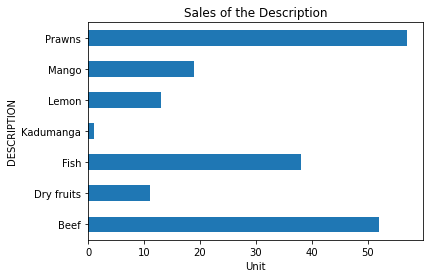

In [201]:
#ploting the horizontal bar graph, to know overall sales of description
plt.figure(figsize=(12,8))
df1.plot(kind="barh",title="Sales of the Description",legend=False)
plt.xlabel("Unit")
plt.ylabel("DESCRIPTION")
plt.show()


#### The above graph represent the overall sales of the description. From this graph we observed that more sales was prawns.